In [2]:
import numpy as np
from numpy import sqrt,exp,sinh,tanh,cosh,log

mass = 2
temp = 1
dt = 0.002
NHL = 4
c = sqrt(temp * NHL / mass)


In [3]:
%precision 16

print(c)

1.4142135623730951


In [4]:
dt2 = dt /2

In [25]:
test = open('test')
lines = test.read()
print(lines)
test.close

InitHamiltonian
25
25
Init Regu done
R[0] = 1.69384604858649
P[0] = 0.6983313529177313
P[0] = 0.6996036608205584
-----------------
R[0] = 1.69384604858649
R[0] = 1.694188887073842
-----------------
c[0] = 1.414213562373095
F[0] = 1.271622225852316
v1[0] = 1
-----------------
P[0] = 0.6996036608205584
V[0] = 0.3428384873518894
v1[0] = 0.9992398510608216
-----------------
P[0] = 0.6996036608205584
P[0] = 0.682343351830764
0.2440323481715495
fric[0] = 0.1
-0.9998000199986667
0.002828285709282253
v1[0] = 1.000016054861955
-0.1799292742369543
fric[1] = 0.1
-0.9998000199986667
0.002828285709282253
v1[1] = 0.9983630432687237
v1[0] = 1.000016054861955
-0.192976330726892
fric[0] = 0.1
-0.9998000199986667
0.002828285709282253
v1[0] = 0.9974917903357075
-1.217146321636275
fric[1] = 0.1
-0.9998000199986667
0.002828285709282253
v1[1] = 0.9918183718406473
R[0] = 1.695156090277375
q = 4936 p = 5062



<function TextIOWrapper.close()>

In [11]:
R0 = 1.69384604858649
Req = 2.33
omega = 1
F0 = - mass * omega * omega * (R0 - Req)
F0

1.2723079028270203

In [13]:
P0 = 0.6983313529177313
P = P0  + F0 * dt2
P,'P[0] = 0.6996036608205584'

(0.6996036608205584, 'P[0] = 0.6996036608205584')

In [15]:
'R[0] = 1.69384604858649'
V = c * tanh(P/mass/c)
print(V)
R = R0 + V * dt2
R, 'R[0] = 1.694188887073842'

0.34283848735188943


(1.6941888870738417, 'R[0] = 1.694188887073842')

In [18]:
v1 = 1
v1 = v1 + (P * V -temp)* dt2
v1,'v1[0] = 0.9992398510608216'

(0.9992398510608216, 'v1[0] = 0.9992398510608216')

In [21]:
'P[0] = 0.6996036608205584, P[0] = 0.682343351830764'
fric = 0.1
Q = temp * (dt * 100)**2
P *= exp(- v1 * dt2 / Q)
P,'P[0] = 0.682343351830764'

(0.682343351830764, 'P[0] = 0.682343351830764')

In [26]:
v1 = 0.9992398510608216
v1 = v1 * exp(-fric * dt)+sqrt(Q * temp * (1 - exp(-2* fric* dt)))* 0.2440323481715495
v1, 'v1[0] = 1.000016054861955'

(1.000016054861955, 'v1[0] = 1.000016054861955')

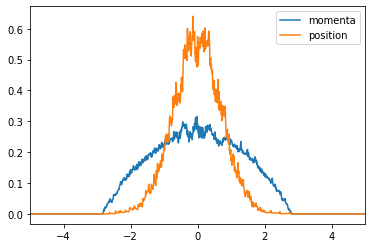

In [33]:
import matplotlib.pyplot as plt
dist1traj = np.loadtxt("dist_1traj")
dist1traj[1]
posi = dist1traj[:,0]
momenta = dist1traj[:,1]
plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label = 'momenta 1 traj' )
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label= 'position 1 traj')
plt.xlim(-5,5)
plt.legend()

In [34]:
x = np.arange(-50,50,0.01)
p = np.arange(-50,50,0.01)
mass = 2
omega = 1

beta = 1
Zx = sum(exp( - 0.5 * beta * (mass * omega * omega * x * x)))
Zp = sum(exp(- 0.5 * beta * (p * p / (2*mass)) ))
print(Zx,Zp)

177.24538509058678 501.32565492629874


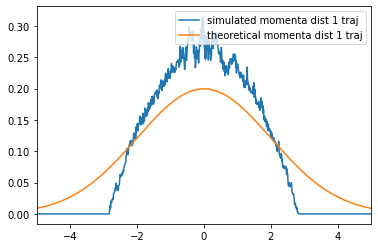

In [35]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label='simulated momenta dist 1 traj')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 1 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()

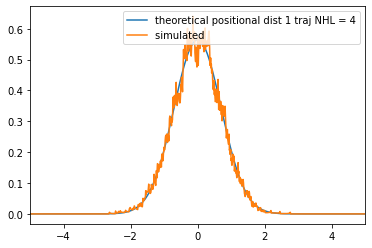

In [37]:
plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 1 traj NHL = 4')
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

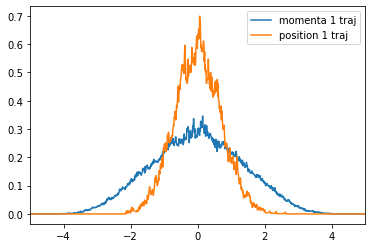

In [38]:
dist1traj = np.loadtxt("dist_1traj_NHL10")
dist1traj[1]
posi = dist1traj[:,0]
momenta = dist1traj[:,1]
plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label = 'momenta 1 traj' )
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label= 'position 1 traj')
plt.xlim(-5,5)
plt.legend()

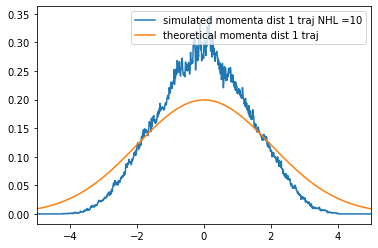

In [41]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label='simulated momenta dist 1 traj NHL =10')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 1 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()

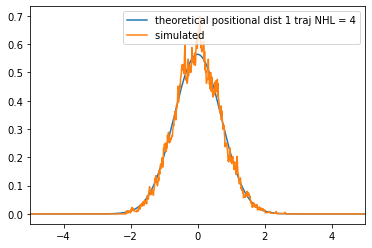

In [40]:
plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 1 traj NHL = 10')
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

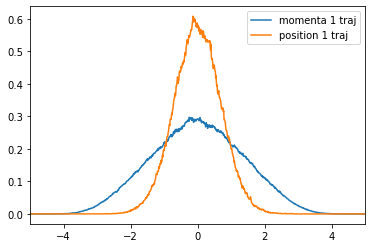

In [43]:
dist1traj = np.loadtxt("dist_100traj_NHL10")
dist1traj[1]
posi = dist1traj[:,0]
momenta = dist1traj[:,1]
plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label = 'momenta 1 traj' )
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label= 'position 1 traj')
plt.xlim(-5,5)
plt.legend()

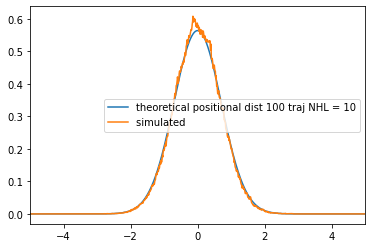

In [44]:
plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 100 traj NHL = 10')
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

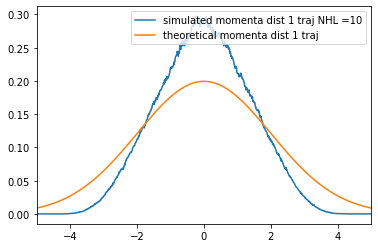

In [45]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label='simulated momenta dist 1 traj NHL =10')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 1 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()

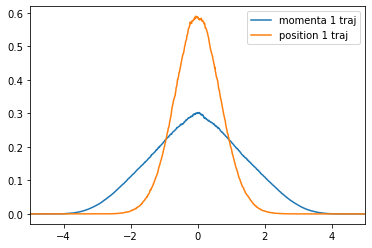

In [46]:
dist1traj = np.loadtxt("dist_100traj_NHL10_long")
dist1traj[1]
posi = dist1traj[:,0]
momenta = dist1traj[:,1]
plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label = 'momenta 1 traj' )
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label= 'position 1 traj')
plt.xlim(-5,5)
plt.legend()

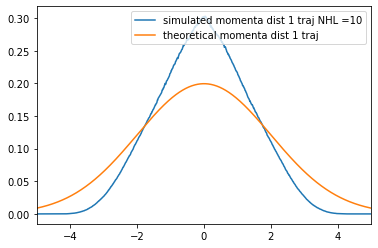

In [47]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label='simulated momenta dist 1 traj NHL =10')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 1 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()

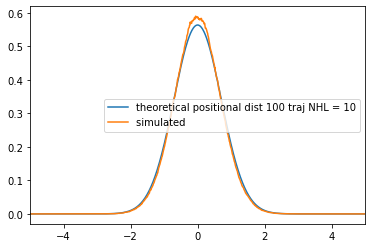

In [48]:
plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 100 traj NHL = 10')
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

In [56]:
Ene_traj = np.loadtxt('Traj_ENE')
Ene_traj[0]

array([0.2352607300547696, 0.0682015392627738, 0.1670591907919958])

In [57]:
E = Ene_traj[:,0]
K = Ene_traj[:,1]
P = Ene_traj[:,2]
t = np.arange(0, len(E)*dt, dt)


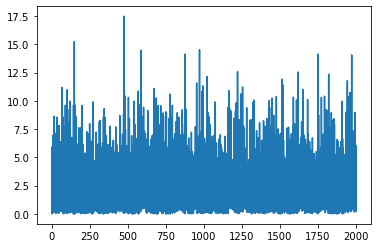

In [58]:
plt.plot(t,E)

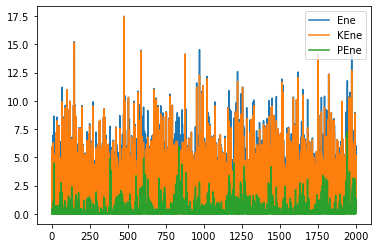

In [59]:
plt.plot(t,E,label='Ene')
plt.plot(t,K,label='KEne')
plt.plot(t,P,label='PEne')
plt.legend()

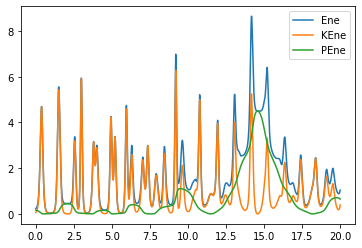

In [60]:
plt.plot(t[:10000],E[:10000],label='Ene')
plt.plot(t[:10000],K[:10000],label='KEne')
plt.plot(t[:10000],P[:10000],label='PEne')
plt.legend()

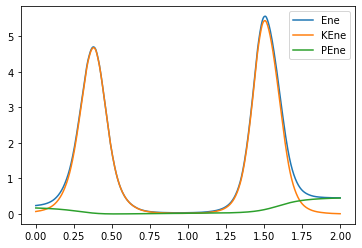

In [62]:
plt.plot(t[:1000],E[:1000],label='Ene')
plt.plot(t[:1000],K[:1000],label='KEne')
plt.plot(t[:1000],P[:1000],label='PEne')
plt.legend()

In [63]:
config = np.loadtxt('config')
config[0]

array([2.278680614660584, 0.382560590918947])

In [64]:
x = config[:,0]
p = config[:,1]

[]

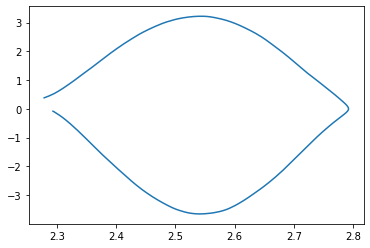

In [65]:
plt.plot(x[:1000],p[:1000])
plt.plot()

[]

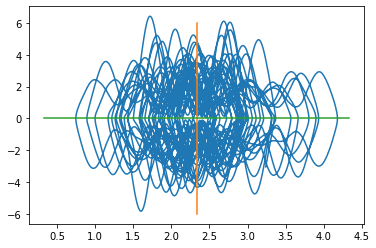

In [69]:
plt.plot(x[:100000],p[:100000])
plt.plot(np.zeros(1000)+2.33,np.arange(-6,6,(12)/1000))
plt.plot(np.arange(-2,2,4/1000)+2.33,np.zeros(1000))
plt.plot()

[]

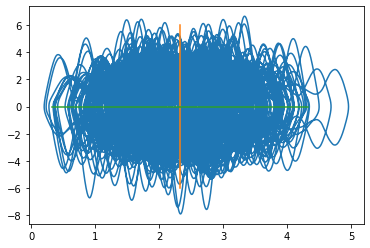

In [70]:
plt.plot(x[:1000000],p[:1000000])
plt.plot(np.zeros(1000)+2.33,np.arange(-6,6,(12)/1000))
plt.plot(np.arange(-2,2,4/1000)+2.33,np.zeros(1000))
plt.plot()